In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stock = input("Enter the code of the stock: ")     # Enter GC=F as code for gold
data = yf.download(stock,"2008-01-01","2021-01-18")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,843.200012,843.200012,843.200012,834.900024,834.900024,4
2008-01-02,848.700012,857.799988,846.400024,857.000000,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,859.599976,4


In [5]:
data.shape

(3255, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3255 entries, 2007-12-31 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3255 non-null   float64
 1   High       3255 non-null   float64
 2   Low        3255 non-null   float64
 3   Close      3255 non-null   float64
 4   Adj Close  3255 non-null   float64
 5   Volume     3255 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.0 KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000
mean,1316.159816,1323.292996,1308.347497,1315.899631,1315.899631,5542.007680
std,262.677504,263.982520,261.225100,262.713551,262.713551,29509.825257
min,705.000000,715.500000,681.000000,704.900024,704.900024,0.000000
25%,1183.250000,1189.200012,1176.349976,1183.450012,1183.450012,41.500000
50%,1282.599976,1287.300049,1278.000000,1282.500000,1282.500000,138.000000
75%,1486.049988,1491.549988,1477.100037,1483.349976,1483.349976,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


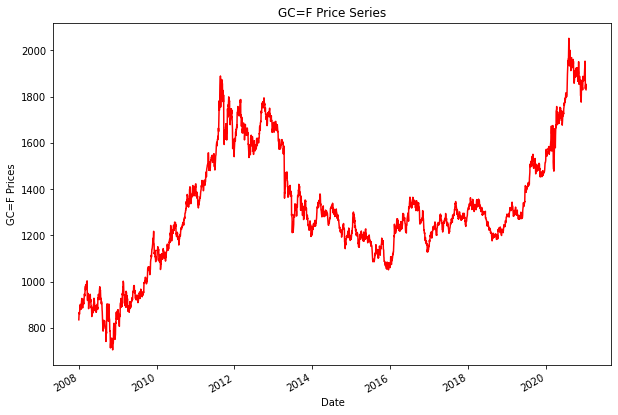

In [8]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{} Prices".format(stock))
plt.title("{} Price Series".format(stock))
plt.show()

In [9]:
x = data.drop("Close", axis='columns')
y = data["Close"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.predict(x_test)

array([1222.90002441, 1453.59997559, 1172.59997559, 1377.        ,
        929.79998779, 1222.19995117, 1323.59997559, 1208.59997559,
       1319.40002441, 1107.80004883, 1061.69995117, 1194.09997559,
       1195.        , 1161.69995117, 1695.59997559, 1168.40002441,
        926.59997559, 1749.5       , 1076.40002441, 1842.90002441,
       1338.        , 1659.09997559, 1944.69995117, 1347.59997559,
       1548.40002441,  895.59997559, 1674.80004883, 1168.80004883,
       1759.80004883, 1373.09997559, 1228.59997559, 1788.5       ,
       1331.30004883,  868.5       , 1099.30004883, 1294.5       ,
       1341.30004883, 1704.80004883, 1137.09997559, 1490.90002441,
       1437.90002441, 1319.69995117, 1224.5       , 1604.69995117,
       1536.19995117, 1316.90002441, 1276.90002441, 1556.40002441,
       1422.59997559, 1333.69995117, 1274.09997559, 1352.40002441,
       1324.30004883, 1324.69995117, 1295.09997559,  867.40002441,
       1901.09997559, 1811.40002441, 1291.69995117,  901.70001

In [12]:
y_test

Date
2018-11-08    1222.900024
2013-04-26    1453.599976
2015-06-24    1172.599976
2013-06-11    1377.000000
2009-03-13     929.799988
                 ...     
2016-08-01    1351.400024
2009-10-23    1055.599976
2015-06-11    1179.900024
2010-11-10    1399.099976
2012-07-20    1582.500000
Name: Close, Length: 651, dtype: float64

In [13]:
lr.score(x_test,y_test)

1.0